<h2>Imports</h2>

In [1]:
import matplotlib.pyplot as plt
import random as rn
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Input, Activation, Flatten, Dropout
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


<h2>Loading Data</h2>

In [2]:
train_data = 'data/train.p'
test_data = 'data/test.p'

with open(train_data, 'rb') as f:
    train = pickle.load(f)

with open(test_data, 'rb') as f:
    test = pickle.load(f)

<h1>Data Info</h1>
<p>Spliting the train data as train and validation set</p>

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(train['features'], train['labels'], test_size=0.3, random_state=0)
X_test, Y_test = test['features'], test['labels']

n_train = X_train.shape[0]
n_val = X_val.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1], X_train.shape[2]
n_channels = X_train.shape[3]
n_classes = np.unique(train['labels']).size

print('Train data size:\t\t\t', n_train)
print('Validation data size:\t\t\t', n_val)
print('test data size:\t\t\t\t', n_test)
print('Image shape:\t\t\t\t', image_shape)
print('Number of color channels in image:\t', n_channels)
print('Number of classes:\t\t\t', n_classes)

Train data size:			 27446
Validation data size:			 11763
test data size:				 12630
Image shape:				 (32, 32)
Number of color channels in image:	 3
Number of classes:			 43


<h2>Data Normalization</h2>
<p>Process all the data as close as mean 0.0 and standard deviation 1.0.</p>

In [4]:
def normalize(arr):
    arr = arr.astype('float32')
    return (arr - np.mean(arr))/np.std(arr)

X_train_norm = normalize(X_train)
X_val_norm = normalize(X_val)
X_test_norm = normalize(X_test)

def print_info(st, arr_1, arr_2):
    print('{} Data: Before normalization : type: {}, mean: {}, std: {}. After processing, type: {}, mean: {}, std: {}'. format(st, arr_1.dtype, round(np.mean(arr_1),2), round(np.std(arr_1),2), arr_2.dtype, round(np.mean(arr_2),2), round(np.std(arr_2),2)))

print_info('Train', X_train, X_train_norm)
print_info('Valdation', X_val, X_val_norm)
print_info('Test', X_test, X_test_norm)

Train Data: Before normalization : type: uint8, mean: 82.54, std: 68.96. After processing, type: float32, mean: 0.0, std: 1.0
Valdation Data: Before normalization : type: uint8, mean: 82.95, std: 69.22. After processing, type: float32, mean: -0.0, std: 1.0
Test Data: Before normalization : type: uint8, mean: 82.15, std: 68.74. After processing, type: float32, mean: -0.0, std: 1.0


<p>Convert all the classes as one hot encode.</p>

In [5]:
def make_categorical(arr):
    return np_utils.to_categorical(arr, n_classes)

Y_train_cat = make_categorical(Y_train)
Y_val_cat = make_categorical(Y_val)
Y_test_cat = make_categorical(Y_test)

<h2>Some Random Image</h2>
<p>Before normalization</p>

In [6]:
trc = rn.sample(range(n_test), 16)

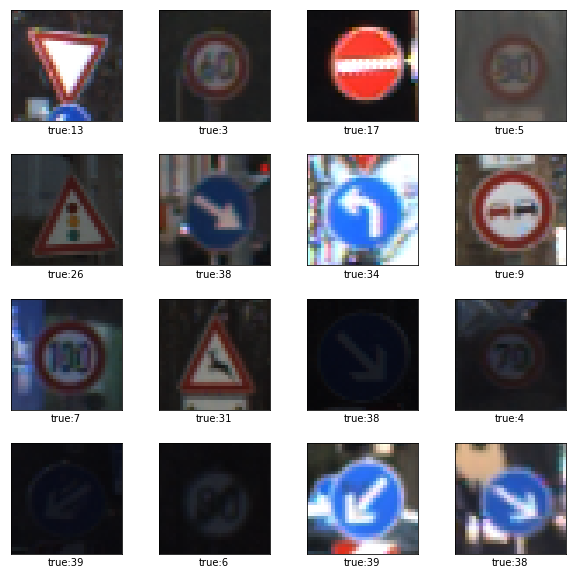

In [7]:
def plot_images(arr_1, arr_2, pred):
    fig, axes = plt.subplots(4, 4, figsize=(10,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        if type(pred) != type(np.array([])):
            ax.imshow(arr_1[trc[i]])
            ax.set_xlabel('true:{}'.format(arr_2[trc[i]]))
        else:
            ax.imshow(arr_1[trc[i]])
            ax.set_xlabel('true:{}, pred:{}'.format(arr_2[trc[i]], pred[trc[i]]))
        ax.set_xticks([])
        ax.set_yticks([])
        
plot_images(X_test, Y_test, pred=False)

<p>After normalization</p>

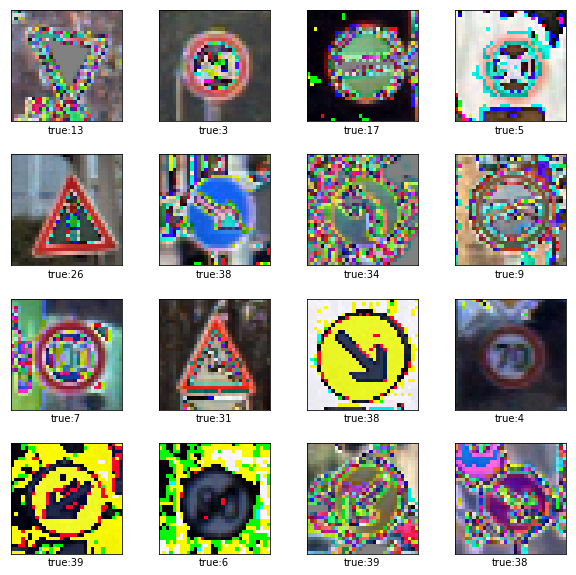

In [8]:
plot_images(X_test_norm, Y_test, pred=False)

<h2>Build the Model with Keras</h2>

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_2 (Dense)              (None, 43)                5547      
Total params: 3,692,971
Trainable params: 3,692,971
Non-trainable params: 0
_________________________________________________________________


<h2>Train the Model</h2>

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train_norm, Y_train_cat, batch_size=64, epochs=20, verbose=1, validation_data=(X_val_norm, Y_val_cat))

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 104s - loss: 0.9956 - acc: 0.7513 - val_loss: 0.3330 - val_acc: 0.9146
Epoch 2/20
27446/27446 [==============================] - 114s - loss: 0.2065 - acc: 0.9456 - val_loss: 0.2591 - val_acc: 0.9305
Epoch 3/20
27446/27446 [==============================] - 107s - loss: 0.1112 - acc: 0.9705 - val_loss: 0.1878 - val_acc: 0.9554
Epoch 4/20
27446/27446 [==============================] - 111s - loss: 0.0767 - acc: 0.9786 - val_loss: 0.1999 - val_acc: 0.9506
Epoch 5/20
27446/27446 [==============================] - 112s - loss: 0.0685 - acc: 0.9804 - val_loss: 0.1509 - val_acc: 0.9661
Epoch 6/20
27446/27446 [==============================] - 100s - loss: 0.0424 - acc: 0.9890 - val_loss: 0.1841 - val_acc: 0.9586
Epoch 7/20
27446/27446 [==============================] - 100s - loss: 0.0626 - acc: 0.9830 - val_loss: 0.1789 - val_acc: 0.9616
Epoch 8/20
27446/27446 [=======================

<h2>Model Evaluation</h2>

In [13]:
score, acc = model.evaluate(X_test_norm, Y_test_cat, batch_size=64, verbose=0)

In [14]:
print('Score: ', score)
print('Acc: ', acc)

Score:  0.879196501911
Acc:  0.888202691994


<h2>Predicted Classes</h2>

In [15]:
Y_pred = model.predict_classes(X_test_norm, batch_size=64, verbose=0)

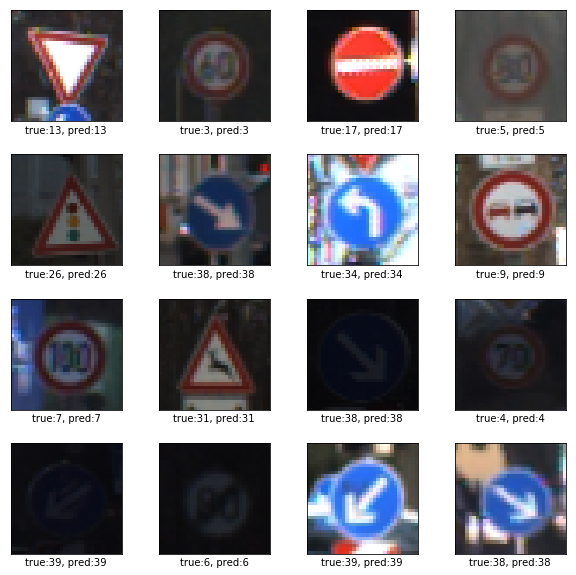

In [16]:
plot_images(X_test, Y_test, Y_pred)

<h2>Build the Model with Pooling Layer</h2>

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_4 (Dense)              (None, 43)                5547      
Total params: 928,171
Trainable params: 928,171
Non-trainable params: 0
_________________________________________________________________


<h2>Train the Model</h2>

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train_norm, Y_train_cat, batch_size=64, epochs=20, verbose=1, validation_data=(X_val_norm, Y_val_cat))

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 70s - loss: 0.9746 - acc: 0.7484 - val_loss: 0.3592 - val_acc: 0.9036
Epoch 2/20
27446/27446 [==============================] - 67s - loss: 0.2285 - acc: 0.9417 - val_loss: 0.2109 - val_acc: 0.9461
Epoch 3/20
27446/27446 [==============================] - 65s - loss: 0.1227 - acc: 0.9691 - val_loss: 0.2018 - val_acc: 0.9443
Epoch 4/20
27446/27446 [==============================] - 69s - loss: 0.1105 - acc: 0.9701 - val_loss: 0.1714 - val_acc: 0.9559
Epoch 5/20
27446/27446 [==============================] - 74s - loss: 0.0674 - acc: 0.9820 - val_loss: 0.1357 - val_acc: 0.9697
Epoch 6/20
27446/27446 [==============================] - 73s - loss: 0.0736 - acc: 0.9807 - val_loss: 0.1396 - val_acc: 0.9697
Epoch 7/20
27446/27446 [==============================] - 68s - loss: 0.0384 - acc: 0.9908 - val_loss: 0.1213 - val_acc: 0.9733
Epoch 8/20
27446/27446 [==============================

<h2>Model Evaluation</h2>

In [21]:
score, acc = model.evaluate(X_test_norm, Y_test_cat, batch_size=64, verbose=0)

In [22]:
print('Score: ', score)
print('Acc: ', acc)

Score:  0.601839751708
Acc:  0.913855898692


<h2>Predicted Classes</h2>

In [23]:
Y_pred = model.predict_classes(X_test_norm, batch_size=64, verbose=0)

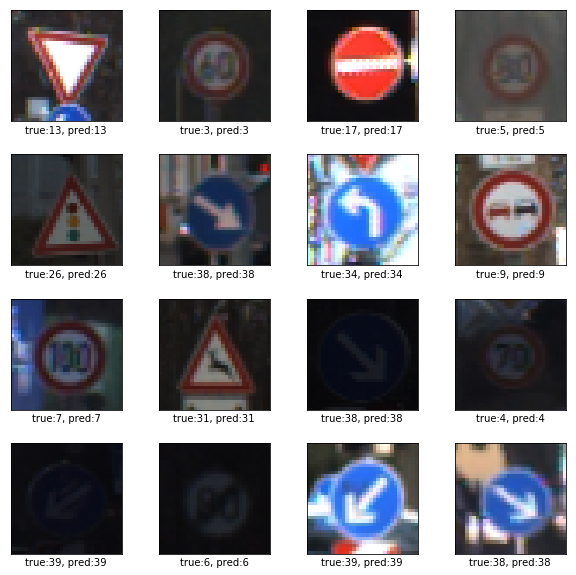

In [24]:
plot_images(X_test, Y_test, Y_pred)

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add((Dropout(0.5)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_6 (Dense)              (None, 43)                5547      
Total para

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(X_train_norm, Y_train_cat, batch_size=64, epochs=20, verbose=1, validation_data=(X_val_norm, Y_val_cat))

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 73s - loss: 1.0311 - acc: 0.7262 - val_loss: 0.3178 - val_acc: 0.9217
Epoch 2/20
27446/27446 [==============================] - 69s - loss: 0.3028 - acc: 0.9150 - val_loss: 0.2001 - val_acc: 0.9475
Epoch 3/20
27446/27446 [==============================] - 69s - loss: 0.2045 - acc: 0.9426 - val_loss: 0.1554 - val_acc: 0.9633
Epoch 4/20
27446/27446 [==============================] - 69s - loss: 0.1642 - acc: 0.9529 - val_loss: 0.1412 - val_acc: 0.9656
Epoch 5/20
27446/27446 [==============================] - 69s - loss: 0.1295 - acc: 0.9638 - val_loss: 0.1196 - val_acc: 0.9739
Epoch 6/20
27446/27446 [==============================] - 68s - loss: 0.1228 - acc: 0.9643 - val_loss: 0.1226 - val_acc: 0.9731
Epoch 7/20
27446/27446 [==============================] - 69s - loss: 0.1070 - acc: 0.9703 - val_loss: 0.1115 - val_acc: 0.9759
Epoch 8/20
27446/27446 [==============================

In [29]:
score, acc = model.evaluate(X_test_norm, Y_test_cat, batch_size=64, verbose=0)

In [30]:
print('Score: ', score)
print('Acc: ', acc)

Score:  0.68842889651
Acc:  0.899366587452


In [31]:
Y_pred = model.predict_classes(X_test_norm, batch_size=64, verbose=0)

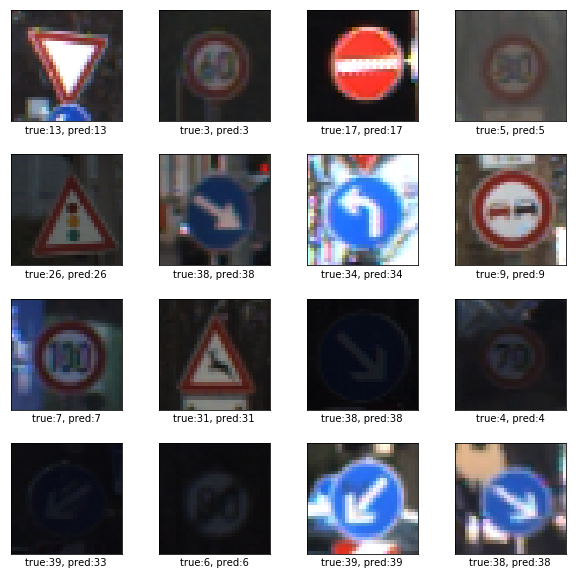

In [32]:
plot_images(X_test, Y_test, Y_pred)

In [33]:
model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), input_shape=(16, 16, 16), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), input_shape=(7, 7, 32), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add((Dropout(0.5)))
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
activation_4 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          18496     
__________

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
history = model.fit(X_train_norm, Y_train_cat, batch_size=64, epochs=20, verbose=1, validation_data=(X_val_norm, Y_val_cat))

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 77s - loss: 1.8103 - acc: 0.4897 - val_loss: 0.4784 - val_acc: 0.8738
Epoch 2/20
27446/27446 [==============================] - 71s - loss: 0.4940 - acc: 0.8483 - val_loss: 0.1847 - val_acc: 0.9586
Epoch 3/20
27446/27446 [==============================] - 66s - loss: 0.2867 - acc: 0.9095 - val_loss: 0.1153 - val_acc: 0.9702
Epoch 4/20
27446/27446 [==============================] - 66s - loss: 0.2016 - acc: 0.9388 - val_loss: 0.0785 - val_acc: 0.9787
Epoch 5/20
27446/27446 [==============================] - 67s - loss: 0.1667 - acc: 0.9484 - val_loss: 0.0698 - val_acc: 0.9822
Epoch 6/20
27446/27446 [==============================] - 67s - loss: 0.1420 - acc: 0.9560 - val_loss: 0.0560 - val_acc: 0.9861
Epoch 7/20
27446/27446 [==============================] - 67s - loss: 0.1239 - acc: 0.9623 - val_loss: 0.0644 - val_acc: 0.9833
Epoch 8/20
27446/27446 [==============================

In [37]:
score, acc = model.evaluate(X_test_norm, Y_test_cat, batch_size=64, verbose=0)

In [38]:
print('Score: ', score)
print('Acc: ', acc)

Score:  0.197350208382
Acc:  0.961361836859


In [39]:
Y_pred = model.predict_classes(X_test_norm, batch_size=64, verbose=0)

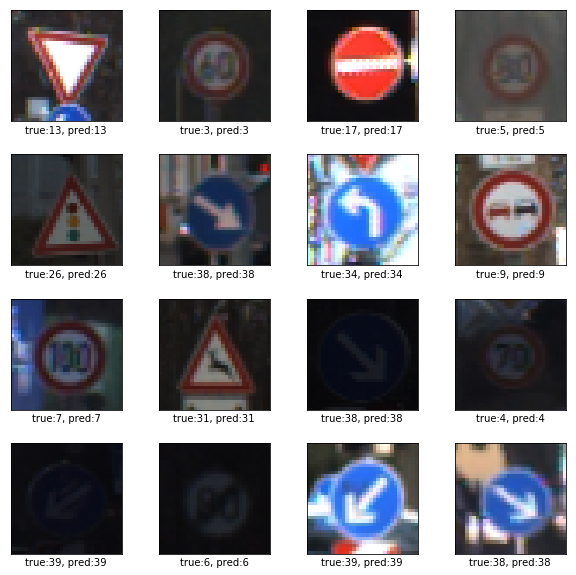

In [40]:
plot_images(X_test, Y_test, Y_pred)